#Tagore


##Download Data

### Upload kaggle.json

In [ ]:
# configure kaggle api

#upload kaggle.json
from google.colab import files
files.upload()


### Download and extract data

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nrkapri/rabindranath-tagore-online-variorum
!unzip rabindranath-tagore-online-variorum.zip -d tagore

 92% 159M/173M [00:01<00:00, 163MB/s]
100% 173M/173M [00:01<00:00, 165MB/s]
Archive:  rabindranath-tagore-online-variorum.zip
  inflating: tagore/bangla_drama_all.txt  
  inflating: tagore/bangla_fiction_all.txt  
  inflating: tagore/bangla_non_fiction_all.txt  
  inflating: tagore/bangla_poems_and_songs_all.txt  
  inflating: tagore/tagore_poem_gen.h5  


### Show Data

In [ ]:
!head -30 tagore/bangla_fiction_all.txt

জ্যাঠামশায়
(১)
আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম। শচীশ তখন বি এ ক্লাসে পড়িতেছে। আমাদের বয়স প্রায় সমান হইবে।
শচীশকে দেখিলে মনে হয় যেন একটা জ্যোতিষ্ক— তার চোখ জ্বলিতেছে; তার লম্বা সরু আঙুলগুলি যেন আগুনের শিখা; তার গায়ের রং যেন রং নহে তাহা আভা। শচীশকে যখন দেখিলাম অমনি যেন তার অন্তরাত্মাকে দেখিতে পাইলাম;— তাই একমুহূর্ত্তে তাহাকে ভালোবাসিলাম।
কিন্তু আশ্চর্য্য এই যে শচীশের সঙ্গে যারা পড়ে তাদের অনেকেরই তার উপরে একটা বিষম বিদ্বেষ। আসল কথা, যাহারা দশের মত, বিনাকারণে দশের সঙ্গে তাহাদের বিরোধ বাধে না। কিন্তু মানুষের ভিতরকার দীপ্যমান সত্যপুরুষটি স্থুলতা ভেদ করিয়া যখন দেখা দেয় তখন অকারণে কেহবা তাহাকে প্রাণপণে পূজা করে আবার অকারণে কেহবা তাহাকে প্রাণপণে অপমান করিয়া থাকে।
আমার মেসের ছেলেরা বুঝিয়াছিল আমি শচীশকে মনে মনে ভক্তি করি। এটাতে সর্ব্বদাই তাহাদের যেন আরামের ব্যাঘাত করিত। তাই আমাকে শুনাইয়া শচীশের সম্বন্ধে কটুকথা বলিতে তাহাদের একদিনও কামাই যাইতনা। আমি জানিতাম চোখে বালি পড়িলে রগড়াইতে গেলেই বাজে বেশি— কথাগুলো যেখানে কর্কশ সেখানে জবাব না করাই ভালো। কিন্তু একদিন শচীশের চরিত্রের উপর 

## Import Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.8.2


## Constants

In [ ]:
MIN_WORDS = 2 # minimum words in a sentence
MAX_WORDS = 50
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 1024
EMBEDDING_OUTPUT_SIZE = 128

## Process Data

### Tokenize

In [ ]:
# read fictions
with open('tagore/bangla_fiction_all.txt') as file:
  lines = file.readlines()
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n”।—“')
tokenizer.fit_on_texts(lines)
tokenizer.word_index
print(len(tokenizer.word_index))
sequences = tokenizer.texts_to_sequences(lines)
sequences = [s[:MAX_WORDS] for s in sequences if len(s) >= MIN_WORDS]

91635


### Visualize

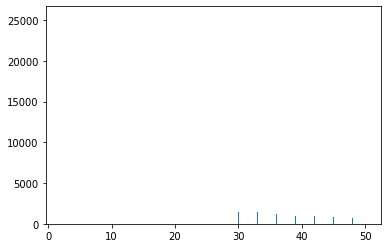

In [ ]:
line_lens = np.array([len(s) for s in sequences])
plt.hist(line_lens, bins=2000)
plt.show()

### N-Grams

In [ ]:
def n_grams(sequence):
  seqs = []
  for i in range(1, len(sequence)):
    seqs.append(sequence[:i+1])

  return seqs
print(n_grams([0,1,2,3,4]))

ng_sequences = [ng for seq in sequences for ng in n_grams(seq)]


[[0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4]]


In [ ]:
ng_sequences[:10]

[[5, 34938],
 [5, 34938, 18],
 [5, 34938, 18, 890],
 [5, 34938, 18, 890, 71],
 [5, 34938, 18, 890, 71, 3797],
 [5, 34938, 18, 890, 71, 3797, 189],
 [5, 34938, 18, 890, 71, 3797, 189, 657],
 [5, 34938, 18, 890, 71, 3797, 189, 657, 683],
 [5, 34938, 18, 890, 71, 3797, 189, 657, 683, 36],
 [5, 34938, 18, 890, 71, 3797, 189, 657, 683, 36, 2247]]

### Padding

In [ ]:
padded_sequences = pad_sequences(ng_sequences, maxlen=MAX_WORDS)

In [ ]:
tokenizer.sequences_to_texts(padded_sequences[:15, :])

['আমি পাড়াগাঁ',
 'আমি পাড়াগাঁ হইতে',
 'আমি পাড়াগাঁ হইতে কলিকাতায়',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি এ',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি এ ক্লাসে',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি এ ক্লাসে পড়িতেছে',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি এ ক্লাসে পড়িতেছে আমাদের',
 'আমি পাড়াগাঁ হইতে কলিকাতায় আসিয়া কালেজে প্রবেশ করিলাম শচীশ তখন বি এ ক্লাসে পড়িতেছে আমাদের বয়স']

In [ ]:
padded_sequences.shape

(3037299, 50)

### Prepare traing Dataset

In [ ]:
train_x_np = padded_sequences[:, : MAX_WORDS - 1]
train_y_np = padded_sequences[:, MAX_WORDS - 1 :]
print(f'Type of x {type(train_x_np)}, type of y {type(train_y_np)}')
print(f'shape of x {train_x_np.shape}, shape of y {train_y_np.shape}')

Type of x <class 'numpy.ndarray'>, type of y <class 'numpy.ndarray'>
shape of x (3037299, 49), shape of y (3037299, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x_np, train_y_np))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
for x, y in train_dataset.take(1):
  print(x.shape ,'->', y.shape)

(1024, 49) -> (1024, 1)


## Training

In [ ]:
# Model
num_words = len(tokenizer.word_index) + 1 # 91636
print(f'num_words = {num_words}')
# Layers

input = tf.keras.Input(shape=(49,))
x = tf.keras.layers.Embedding(num_words, EMBEDDING_OUTPUT_SIZE)(input)
x = tf.keras.layers.LSTM(EMBEDDING_OUTPUT_SIZE, activation='relu', return_sequences=True)(x)
x = tf.keras.layers.LSTM(EMBEDDING_OUTPUT_SIZE, activation='relu')(x)
x = tf.keras.layers.Dense(num_words, activation='softmax')(x)

model = tf.keras.Model(inputs = input, outputs = x)
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['acc'])

#model.compile()

num_words = 91636


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 49)]              0         
                                                                 
 embedding (Embedding)       (None, 49, 128)           11729408  
                                                                 
 lstm (LSTM)                 (None, 49, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 91636)             11821044  
                                                                 
Total params: 23,813,620
Trainable params: 23,813,620
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_dataset.cardinality().numpy()

2967

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
2967/2967 [==============================] - 918s 307ms/step - loss: 8.1433 - acc: 0.0236
Epoch 2/10
2967/2967 [==============================] - 900s 303ms/step - loss: 7.2529 - acc: 0.0518
Epoch 3/10
2967/2967 [==============================] - 898s 303ms/step - loss: 6.6594 - acc: 0.0782
Epoch 4/10
2967/2967 [==============================] - 897s 302ms/step - loss: 6.1631 - acc: 0.0975
Epoch 5/10
2967/2967 [==============================] - 901s 303ms/step - loss: 5.7286 - acc: 0.1173
Epoch 6/10
2967/2967 [==============================] - 916s 309ms/step - loss: 5.3161 - acc: 0.1453
Epoch 7/10
2967/2967 [==============================] - 912s 307ms/step - loss: 4.9424 - acc: 0.1811
Epoch 8/10
2967/2967 [==============================] - 897s 302ms/step - loss: 4.6266 - acc: 0.2154
Epoch 9/10
2967/2967 [==============================] - 906s 305ms/step - loss: 4.3668 - acc: 0.2460
Epoch 10/10
2967/2967 [==============================] - 899s 303ms/step - loss: 4.1364 - a

In [ ]:
#Save Model
model.save('tagore_model-10')

INFO:tensorflow:Assets written to: tagore_model-10/assets


In [ ]:
!zip -r tagore-model-10.zip /content/tagore_model-10

  adding: content/tagore_model-10/ (stored 0%)
  adding: content/tagore_model-10/assets/ (stored 0%)
  adding: content/tagore_model-10/variables/ (stored 0%)
  adding: content/tagore_model-10/variables/variables.index (deflated 67%)
  adding: content/tagore_model-10/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: content/tagore_model-10/saved_model.pb (deflated 90%)
  adding: content/tagore_model-10/keras_metadata.pb (deflated 89%)


In [ ]:
files.download('/content/tagore-model-10.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>